In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned_fraud_dataset.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['distance_from_home',	'distance_from_last_transaction',	'ratio_to_median_purchase_price']]=scaler.fit_transform(df[['distance_from_home',	'distance_from_last_transaction',	'ratio_to_median_purchase_price']])
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1,1,0,0,0
1,-0.241607,-0.188094,-0.189300,1,0,0,0,0
2,-0.329369,-0.163733,-0.498812,1,0,0,1,0
3,-0.372854,0.021806,-0.522048,1,1,0,1,0
4,0.268572,-0.172968,0.142373,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,1,1,0,0,0
999996,-0.103318,-0.091035,0.340808,1,1,0,0,0
999997,-0.362650,-0.137903,-0.573694,1,1,0,1,0
999998,-0.342098,-0.185523,-0.481628,1,0,0,1,0


# Training Isolation Forest Model

In [4]:
X=df.drop('fraud',axis=1)
y=df['fraud']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=55)

In [ ]:
from sklearn.ensemble import IsolationForest

isof=IsolationForest(n_estimators=300,contamination=0.09577,)
isof.fit(X_train)

y_pred_isof = isof.predict(X_test)
y_pred_isof = [1 if x == -1 else 0 for x in y_pred_isof]
y_scores_isof = -isof.decision_function(X_test)


array([-0.11189898, -0.0887654 , -0.20069476, ..., -0.16296608,
       -0.15682854,  0.0009314 ], shape=(200000,))

[[167814  14893]
 [ 13164   4129]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92    182707
           1       0.22      0.24      0.23     17293

    accuracy                           0.86    200000
   macro avg       0.57      0.58      0.58    200000
weighted avg       0.87      0.86      0.86    200000

ROC-AUC: 0.7414249751372437


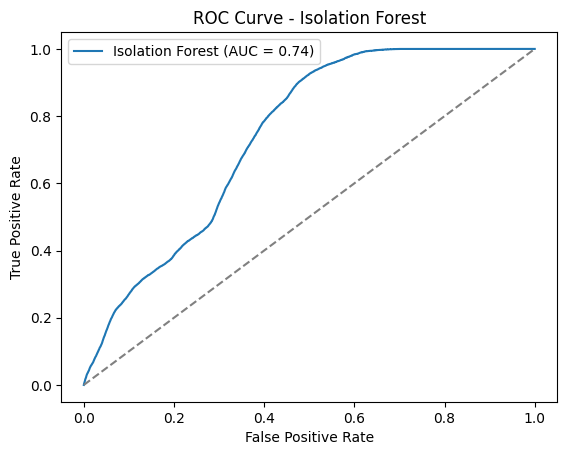

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

print(confusion_matrix(y_test, y_pred_isof))
print(classification_report(y_test, y_pred_isof))
print("ROC-AUC:", roc_auc_score(y_test, y_scores_isof))

fpr, tpr, _ = roc_curve(y_test, y_scores_isof)
plt.plot(fpr, tpr, label=f"Isolation Forest (AUC = {roc_auc_score(y_test, y_scores_isof):.2f})")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Isolation Forest)")
plt.legend()
plt.show()
